## 1 Изучение общей информации о датасете

In [1]:
# Все импортируемые библиотеки

import pandas as pd

! pip install -U kaleido

from plotly import graph_objects as go 
import plotly.express as px

import warnings
warnings.simplefilter('ignore')

Requirement already up-to-date: kaleido in c:\programdata\anaconda3\lib\site-packages (0.2.1)


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 23.1.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [4]:
data['children'].unique()

# Есть аномальные значения

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

In [5]:
data['education'].unique()

# Здесь есть дубликаты

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [6]:
data['family_status'].unique()

# Все в порядке

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [7]:
data['income_type'].unique()

# Все в порядке

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

In [8]:
data['purpose'].unique()

# Здесь объединю все по группам 

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [9]:
data.isna().sum()

# Есть пропуски

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод**

Датасет содержит 21525 строк. Есть данные о заемщиках: количестве детей, доходе, образовании, статусе заемщика, цели кредита.

Есть пропуски в двух столбцах. Тип данных в столбце total_income изменю далее на целочисленный.

## 2 Предобработка данных

### 2.1 Удаление пропусков

In [11]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Столбец 'total_income' — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполню пропуски в этом столбце медианным значением по каждому типу из столбца 'income_type'. Например, у человека с типом занятости сотрудник пропуск в столбце 'total_income' будет заполнен медианным доходом среди всех записей с тем же типом.

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

Столбец 'days_employed' пока невозможно обработать, тк там есть аномальные значения. Сначала разберусь с ними. Затем вернусь к пропускам в этом столбце.

### 2.2 Обработка аномальных значений

В данных есть аномалии, в столбце 'days_employed' есть отрицательные значения. Исправлю их.

In [13]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведу медианное значение трудового стажа 'days_employed' в днях.

In [14]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) аномально большие значения. Исправить такие значения сложно, поэтому оставлю их как есть, этот столбец не понадобится для дальнейшего исследования.

In [15]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

In [16]:
# Есть два аномальных значения. Удалю строки, в которых встречаются такие аномальные значения.

data = data[(data['children'] != -1) & (data['children'] != 20)]

In [17]:
# Проверю

data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

**Теперь заполню пропуски в столбце 'days_employed' медианными значениями по каждому типу занятости 'income_type'.**

In [18]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [19]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### 2.3 Изменение типов данных

In [20]:
# Изменю тип

data['total_income'] = data['total_income'].astype(int)

### 2.4 Обработка дубликатов

In [21]:
# Приведу к нижнему регистру

data['education'] = data['education'].str.lower()

In [22]:
data.duplicated().sum()

71

In [23]:
# Удалю дубликаты

data = data.drop_duplicates()

### 2.5 Категоризация данных

Создам новый столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [24]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass
    
data['total_income_category'] = data['total_income'].apply(categorize_income)

Создам новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [25]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'
    
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

In [26]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


**Вывод**

Была проведена предобработка данных:
- Пропуски в столбцах 'total_income' и 'days_employed' были заполнены медианным значением по каждому типу из столбца 'income_type',
- Были исправлены аномальные значения в столбцах 'days_employed' и 'children',
- Изменен тип столбца 'total_income' на  целочисленный,
- Удален 71 дубликат,
- Созданы новые столбцы 'total_income_category' с категориями: 0–30000 — 'E'; 30001–50000 — 'D'; 50001–200000 — 'C'; 200001–1000000 — 'B'; 1000001 и выше — 'A'. И столбец 'purpose_category', в который вошли следующие категории: 'операции с автомобилем', 'операции с недвижимостью', 'проведение свадьбы', 'получение образования'.



## 3 Исследовательский анализ данных

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [27]:
# сгруппируем таблицу по столбцу 'children' и столбцу 'debt'

data_children = data.groupby('children').agg({'debt': ['count', 'sum']}).reset_index()
data_children.columns = data_children.columns.droplevel(0)
data_children.columns = ['children', 'count', 'sum']
print(data_children) 
# наглядно видим, сколько было взято всего кредитов и сколько из них было с просроченной задолжностью
data_children_percent = data.groupby('children')['debt'].mean().reset_index()
data_children_percent['debt'] = round((data_children_percent['debt']*100),2)
print()
print('Количество просроченной задолженности, в % :') 
print(data_children_percent)

   children  count   sum
0         0  14091  1063
1         1   4808   444
2         2   2052   194
3         3    330    27
4         4     41     4
5         5      9     0

Количество просроченной задолженности, в % :
   children  debt
0         0  7.54
1         1  9.23
2         2  9.45
3         3  8.18
4         4  9.76
5         5  0.00


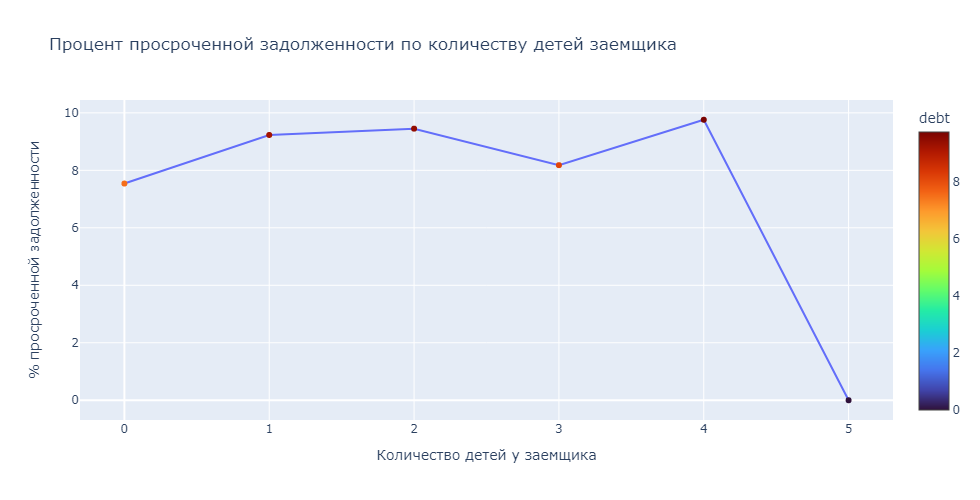

In [28]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=data_children_percent['children'], 
    y=data_children_percent['debt'],
    mode='lines+markers',
    marker=dict(color=data_children_percent['debt'], colorbar=dict(title="debt"), colorscale='turbo')
))

fig.update_layout(title="Процент просроченной задолженности по количеству детей заемщика",
                  xaxis_title="Количество детей у заемщика",
                  yaxis_title="% просроченной задолженности",
                  width=980,
                  height=500
                 )
fig.show("png")

**Вывод**

Выборка не сбалансирована, классы в выборке имеют разные размеры.

В рамках имеющихся данных сделать вывод о том, что семьи с детьми относительно семей без детей имеют какие-то задержки в выплатах кредитов нельзя. Слишком близки доли, чуть измениться выборка и значения могут измениться в другую сторону. Можно сделать вывод, что сколь угодно значимой разницы между группами нет.

Но если считать, что любая разница между группами есть повод для «разделения» классов: кредитополучатели без детей являются более ответственными, чем клиенты, у которых есть дети. Видимо, наличие ребенка накладывает на клиента дополнительные финансовое бремя (обязательства) и клиенты либо менее ответственно относятся к своим кредитным обязательствам, либо не имеют возможности в срок оплачивать обязательства.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [29]:
# Сгруппирую данные о наличии просроченной задолженности по столбцу family_status:

print(data.groupby('family_status').agg({'debt': ['count', 'sum']}))
# Рассчитаю процент
data_family_status = data.groupby('family_status')['debt'].mean().reset_index()
data_family_status['debt'] = round((data_family_status['debt']*100),2)
print()
print('Количество просроченной задолженности, в % :') 
print(data_family_status)


                        debt     
                       count  sum
family_status                    
Не женат / не замужем   2796  273
в разводе               1189   84
вдовец / вдова           951   63
гражданский брак        4134  385
женат / замужем        12261  927

Количество просроченной задолженности, в % :
           family_status  debt
0  Не женат / не замужем  9.76
1              в разводе  7.06
2         вдовец / вдова  6.62
3       гражданский брак  9.31
4        женат / замужем  7.56


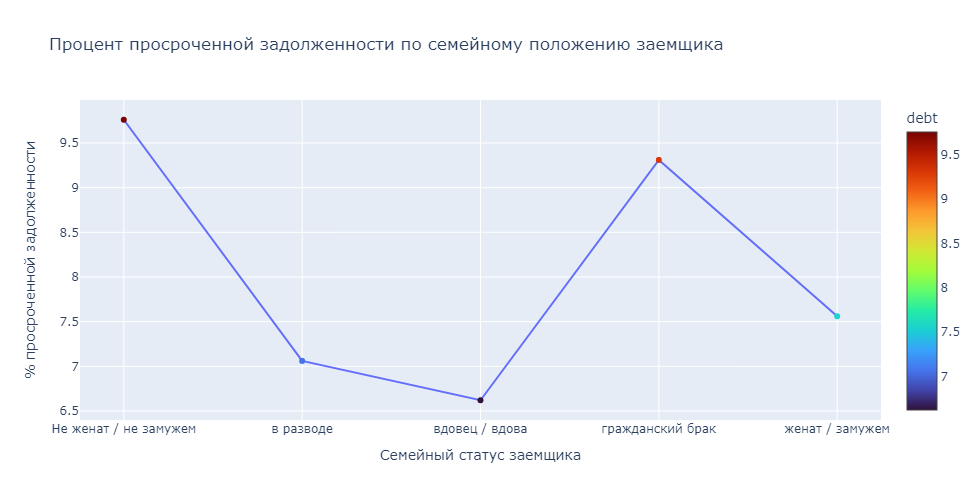

In [30]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=data_family_status['family_status'], 
    y=data_family_status['debt'],
    mode='lines+markers',
    marker=dict(color=data_family_status['debt'], colorbar=dict(title="debt"), colorscale='turbo')
))

fig.update_layout(title="Процент просроченной задолженности по семейному положению заемщика",
                  xaxis_title="Семейный статус заемщика",
                  yaxis_title="% просроченной задолженности",
                  width=980,
                  height=500
                 )
fig.show("png")

**Вывод:** 

Кредитному отделу следует с осторожностью относиться к клиентам, которые не состоят или не состояли в браке. Согласно данным такие клиенты менее ответственные. Получается, что узаконенные отношения ведут к более ответственному отношению к своим обязательствам, семейные люди более скрупулёзно берегут свой семейное спокойствие и несут за него ответственность.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [31]:
# Сгруппирую данные о наличии просроченной задолженности по столбцу 'total_income_category':

print(data.groupby('total_income_category').agg({'debt': ['count', 'sum']}))
data_total_income = data.groupby('total_income_category')['debt'].mean().reset_index()
data_total_income['debt'] = round((data_total_income['debt']*100),2)
print()
print('Количество просроченной задолженности, в % :'), 
print(data_total_income)

                        debt      
                       count   sum
total_income_category             
A                         25     2
B                       5014   354
C                      15921  1353
D                        349    21
E                         22     2

Количество просроченной задолженности, в % :
  total_income_category  debt
0                     A  8.00
1                     B  7.06
2                     C  8.50
3                     D  6.02
4                     E  9.09


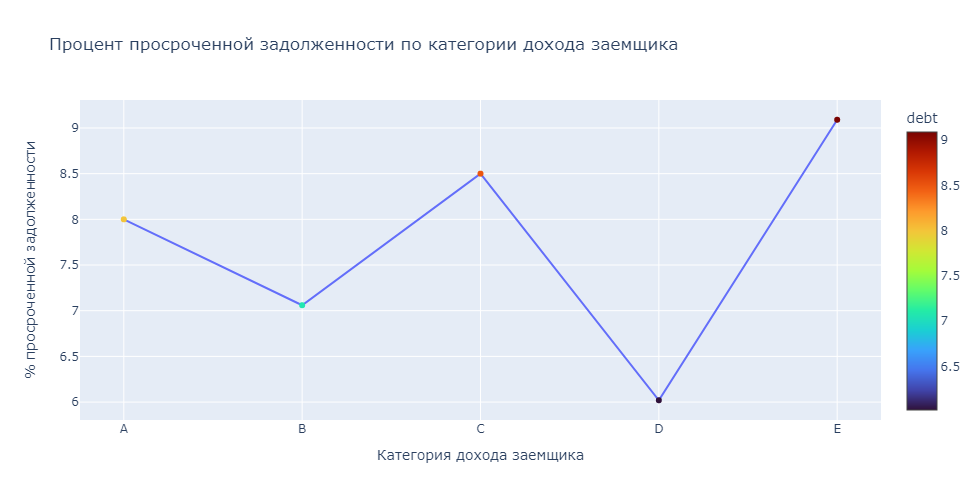

In [32]:
# Еще раз взглянем на категории по доходам:
# 0–30000 — 'E'; 
# 30001–50000 — 'D';
# 50001–200000 — 'C';
# 200001–1000000 — 'B';
# 1000001 и выше — 'A'.

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=data_total_income['total_income_category'], 
    y=data_total_income['debt'],
    mode='lines+markers',
    marker=dict(color=data_total_income['debt'], colorbar=dict(title="debt"), colorscale='turbo')
))

fig.update_layout(title="Процент просроченной задолженности по категории дохода заемщика",
                  xaxis_title="Категория дохода заемщика",
                  yaxis_title="% просроченной задолженности",
                  width=980,
                  height=500
                 )
fig.show("png")

**Вывод**

Выборка по заемщикам, как с наименьшим доходом, так и с наибольшим крайне недостаточна для формирования однозначных выводов. Можно думать, что E-категория самая низкооплачиваемая не может корректно распоряжаться деньгами и «влезает» в кредиты, но тогда неясно почему у А-категории также достаточно высокий процент задолженности. Вывод по группам А и Е неочевиден, мало данных.

Если же взять для анализа только группы В, С и D, то по полученным данным не наблюдаем зависимости "те, кто получает больше ЗП, лучше возвращает кредит». В целом это логично, так как материальный достаток - не единственная переменная, которая влияет на качество кредитной истории.

Однако 2174 пропуска в данных столбца "total_income" ставят под сомнение полученный нами результат. Сводная таблица (или группировка) с данными о зависимости между уровнем дохода и возвратом кредита в срок возможно могла бы выглядеть иначе, если бы не пропущенные данные.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [33]:
# Сгруппирую данные о наличии просроченной задолженности по столбцу 'purpose_category':

print(data.groupby('purpose_category').agg({'debt': ['count', 'sum']}))

# Рассчитаю процент просроченной задолженности
general_purpose = data.groupby('purpose_category')['debt'].count()
non_return_purpose = data.groupby('purpose_category')['debt'].sum()
percent_purpose = round(((non_return_purpose / general_purpose)*100),2)
percent_purpose = percent_purpose.reset_index()
print()
print('Количество просроченной задолженности, в % :'), 
print(percent_purpose)

                           debt     
                          count  sum
purpose_category                    
операции с автомобилем     4279  400
операции с недвижимостью  10751  780
получение образования      3988  369
проведение свадьбы         2313  183

Количество просроченной задолженности, в % :
           purpose_category  debt
0    операции с автомобилем  9.35
1  операции с недвижимостью  7.26
2     получение образования  9.25
3        проведение свадьбы  7.91


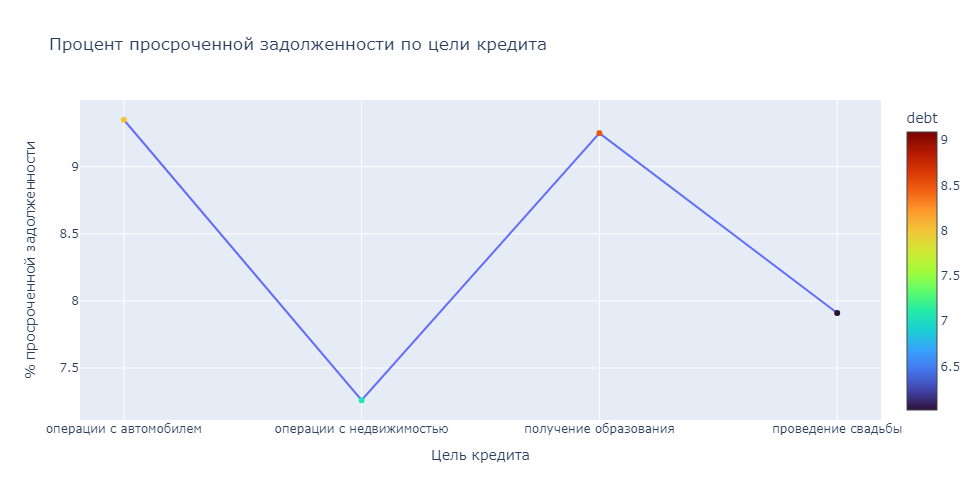

In [34]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=percent_purpose['purpose_category'], 
    y=percent_purpose['debt'],
    mode='lines+markers',
    marker=dict(color=data_total_income['debt'], colorbar=dict(title="debt"), colorscale='turbo')
))

fig.update_layout(title="Процент просроченной задолженности по цели кредита",
                  xaxis_title="Цель кредита",
                  yaxis_title="% просроченной задолженности",
                  width=980,
                  height=500
                 )
fig.show("png")

**Вывод:** 

Чаще всего клиенты берут кредиты для операций с недвижимостью. И они же являются самыми надежными из представленного списка - уровень наличия просроченной задолженности у таких клиентов самый низкий ~ 7.2% Можно предположить, что это связано с тем, что наличие недвижимости - это важная составляющая для человека и к таким кредитам отноятся более ответственно, всё просчитывают и продумывают. И даже в сложных ситуациях, всё-равно стараются вносить платежи во время. А вот самыми ненадежными оказались клиенты, взявшие кредит на операции с автомобилем ~ 9.3% и клиенты, взявшие кредит на получение образования ~ 9.2%.

### 4 Общий вывод

Было проведено исследование, чтобы выявить влияние разных факторов на факт возникновения просроченной задолженности. Входные данные — статистика о платёжеспособности клиентов. Результаты исследования будут учтены при построении модели кредитного скоринга.

Перед проведением исследования были поставлены несколько гипотез:

1. Количество детей влияет на факт возникновения просроченной задолженности.
2. Семейное положение влияет на факт возникновения просроченной задолженности.
3. Уровень дохода клиента влияет на факт возникновения просроченной задолженности.
4. Цель кредита влияет на факт возникновения просроченной задолженности.


В результате исследования удалось выявить следующие зависимости.

**Гипотеза 1. Количество детей влияет на факт погашения кредита в срок.**

**Гипотеза подтверждена частично.** Необходимо больше данных по клиентам с 3,4,5 детьми.

- 7.5% доля просроченных кредитов у клиентов без детей;
- 9.2% доля просроченных кредитов у клиентов с 1 ребенком;
- 9.5% доля просроченных кредитов у клиентов с 2 детьми.

Рекомендация: провести дополнительное исследование на большей выборке данных.

**Гипотеза 2. Семейное положение влияет на факт погашения кредита в срок.**

**Гипотеза подтверждена.**
- у не женатых клиентов (9.8%) и тех, у кого брак не зарегистрирован (9.3%), вероятность стать должником выше.
- у клиентов, состоящих в браке (7.6%), в разводе (7%) и клиентов вдовцов/вдов (6.6%), вероятность стать должником ниже.

Рекомендация: максимальная разница между двумя данными выводами составляет 3.2% - не слишком большая цифра, чтобы наделять этой зависимости высокий вес при принятии решения о кредитоспособности.

**Гипотеза 3. Уровень дохода клиента влияет на факт погашения кредита в срок.**

**Гипотеза подтверждена частично.** Для более точных выводов необходимо больше данных по клиентам с уровнем дохода категории Е(0–30000), D(30001–50000), А(1000001 и выше).

- 8.5% доля просроченных кредитов у заемщиков с доходом 50001–200000;
- 7% доля просроченных кредитов у заемщиков с доходом 200001–1000000.

Рекомендация: провести дополнительное исследование на большей выборке данных.

**Гипотеза 4. Цель кредита влияет на факт погашения кредита в срок.**

**Гипотеза подтверждена.**

- 7.3% доля просроченных кредитов, целью которых были операции с недвижимостью;
- 7.9% доля просроченных кредитов, целью которых было проведение свадьбы;
- 9.3% доля просроченных кредитов, целью которых было получение образования;
- 9.3% доля просроченных кредитов, целью которых были операции с автомобилем.

Рекомендации: разница между пунктами 1 и 3 всего 2% - я не рекомендовала бы наделять этой зависимости высокий вес при принятии решения о кредитоспособности.

**Общие рекомендации:**

1. Для построения модели кредитного скоринга можно использовать зависимости из 2 и 4 гипотезы (семейное положение и цели кредита).
2. Необходимо собрать более полную выборку для повторной проверки 1 и 3 гипотез.